# **EXAMPLE REGRESSION TREES**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/content/tree_regression_example01.xlsx')
df

,X1,X2,Y
0,2,1.0,10
1,3,1.5,10
2,4,2.0,12
3,5,3.0,18


In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
X = df.drop('Y', axis=1)
y = df['Y']

In [5]:
tree = DecisionTreeRegressor()

In [6]:
tree.fit(X,y)

DecisionTreeRegressor()

In [7]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'x[0] <= 4.5\nsquared_error = 10.75\nsamples = 4\nvalue = 12.5'),
 Text(0.4, 0.5, 'x[1] <= 1.75\nsquared_error = 0.889\nsamples = 3\nvalue = 10.667'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = 10.0'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 12.0'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 18.0')]

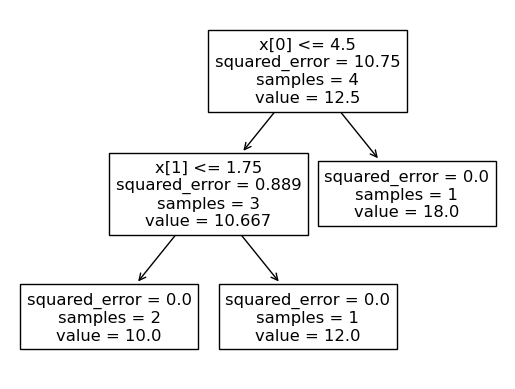

In [8]:
plot_tree(tree)

REGRESSION TREES

- We need to study the possible splits
* the purity measure is MSE (mean squared errors)

In regression trees, the prediction is the mean of Y.

view tablet

In [15]:
ybar = np.mean([10,12,18])
ybar
MSE = (1/3)*((10-ybar)**2+(12-ybar)**2+(18-ybar)**2)
MSE
overall_MSE = ((1/4)*0+(3/4)*MSE)
overall_MSE

8.666666666666664

In [16]:
ybar = np.mean([12,18])
ybar
MSE = (1/2)*((12-ybar)**2+(18-ybar)**2)
print(MSE)
overall_MSE = ((1/4)*0+(3/4)*MSE)
overall_MSE

9.0


In [19]:
ybar = np.mean([10,10,12])
ybar
MSE = (1/3)*((10-ybar)**2+(10-ybar)**2+(12-ybar)**2)
print(MSE)
overall_MSE = ((3/4)*MSE+(1/4)*0)
overall_MSE

0.6666666666666667

In [20]:
df = pd.read_excel('/content/tree_regression_example02.xlsx')
df

,X1,X2,Y
0,2,1,15
1,3,2,10
2,4,5,15
3,5,8,15


In [22]:
X = df.drop('Y', axis=1)
y = df['Y']

In [23]:
tree = DecisionTreeRegressor()

In [24]:
tree.fit(X,y)

DecisionTreeRegressor()

[Text(0.6, 0.8333333333333334, 'x[1] <= 3.5\nsquared_error = 4.688\nsamples = 4\nvalue = 13.75'),
 Text(0.4, 0.5, 'x[0] <= 2.5\nsquared_error = 6.25\nsamples = 2\nvalue = 12.5'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 15.0'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 10.0'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 2\nvalue = 15.0')]

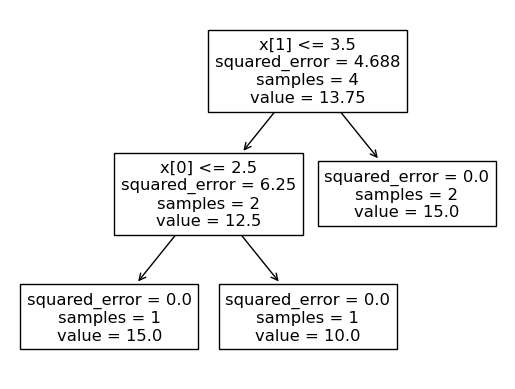

In [25]:
plot_tree(tree)

# Classification Trees - Bank marketing



In [48]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('/content/bank_mark_campaign.csv', sep=';')

df = df.replace('unknown', np.nan) 

col_nan = df.columns[df.isna().any(axis=0)].to_list()
col_num = df.describe().columns.to_list()
df.columns.difference(col_nan + col_num)
col_cat = df.columns.difference(col_nan + col_num + ['y']).to_list()

na_treat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oneh', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer([
    ('na_tr', na_treat, col_nan),
    ('cat_tr', OneHotEncoder(drop='first'), col_cat),
    ('scale_tr', StandardScaler(), col_num)], 
    remainder='passthrough')

pipe = Pipeline([
    ('pre', preprocessor),
    #('gnb', GaussianNB())
    ('tree', DecisionTreeClassifier())])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')


Accuracy= 1.0
[[ 3700     0]
 [    0 29250]]
Recall= 1.0


In [49]:
y_pred2 = pipe.predict(X_test)

acur = accuracy_score(y_test, y_pred2)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_test, y_pred2, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_test, y_pred2, pos_label='yes')
print(f'Recall= {recall}')

Accuracy= 0.8854090798737557
[[ 483  457]
 [ 487 6811]]
Recall= 0.5138297872340426


PROFESSOR NOTES:

* When the results are very contrasting between train set and test set, we should suspect of overfitting of the model.

* Since the accuracy was 100% in the training set, the noise of the training set was also fit.

* However, since the noise of the test set is not the same noise of the training set, the predictors in the test will tend to be poor.

* The trees tend to overfit because they grow without any constraints and then they will be so pure that they fit noise so nicely.

- To avoid overfitting, we need to stop the growth of the tree. Alternatively, we need to prune a full-grown tree.

**PRUNE** (podar a árvore) - drawing a tree, a very complex one, in the sense that it has a lot of nodes. To prune means cut down a certain bratch, will allows to eliminate the nodes after.

This is a hyperparameter, cccp_alpha, which controls the degree of intensity. ccp_alpha assumes positive numbers. The highest its value, the more agressive will be the prunning (and the simpler the tree).

In order to select the best value for the hyperparameter we can do a GridSearchCV.


MY NOTES:

Since the noise of the train set is not the same as in the test set, we are overfitting the noise.

We have an accuracy of 100% in the train set - overfitting the noise.

(pedir notas ao Diogo)

In [53]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('/content/bank_mark_campaign.csv', sep=';')

df = df.replace('unknown', np.nan) 

col_nan = df.columns[df.isna().any(axis=0)].to_list()
col_num = df.describe().columns.to_list()
df.columns.difference(col_nan + col_num)
col_cat = df.columns.difference(col_nan + col_num + ['y']).to_list()

na_treat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oneh', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer([
    ('na_tr', na_treat, col_nan),
    ('cat_tr', OneHotEncoder(drop='first'), col_cat),
    ('scale_tr', StandardScaler(), col_num)], 
    remainder='passthrough')

hyper = {
    'ccp_alpha' : [0.001, 0.01, 0.1, 0.2, 0.5]
}

pipe = Pipeline([
    ('pre', preprocessor),
    #('gnb', GaussianNB())
    #('tree', DecisionTreeClassifier())])
    ('grid', GridSearchCV(DecisionTreeClassifier(), hyper, cv=5))])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')


Accuracy= 0.9136267071320182
[[ 1928  1772]
 [ 1074 28176]]
Recall= 0.5210810810810811


ver tablet - aula dia 24

We are interested on predicting correctly the customers that will accept the deposit.

This model is useless as it is, as a lot of positives are predicted as negatives (1772).

RECALL - % of values yes predicted as yes (verdadeiros positivos). Ideal, the recall_score should be close to 1.

In [58]:
1928/(1928+1772)

0.5210810810810811

In [56]:
y_pred2 = pipe.predict(X_test)

acur = accuracy_score(y_test, y_pred2)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_test, y_pred2, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_test, y_pred2, pos_label='yes')
print(f'Recall= {recall}')

Accuracy= 0.9129643117261471
[[ 493  447]
 [ 270 7028]]
Recall= 0.524468085106383


WHY RECALL_SCORE = 0.521?

In [60]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

The reason for this is that y, the outcome variable, is quite unbalanced in form of the NO cases the model will learn a lot more about the NO cases.

A solution is to change the goal of the grid search by changing the scoring to "roc_auc".

The scoring by default is the accuracy in the previous case.


A way to correct the imabalance of y is to give more weight to the minority class. (Python will penalize heavier the wrongly "yes" misclassified).




In [63]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('/content/bank_mark_campaign.csv', sep=';')

df = df.replace('unknown', np.nan) 

col_nan = df.columns[df.isna().any(axis=0)].to_list()
col_num = df.describe().columns.to_list()
df.columns.difference(col_nan + col_num)
col_cat = df.columns.difference(col_nan + col_num + ['y']).to_list()

na_treat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oneh', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer([
    ('na_tr', na_treat, col_nan),
    ('cat_tr', OneHotEncoder(drop='first'), col_cat),
    ('scale_tr', StandardScaler(), col_num)], 
    remainder='passthrough')

hyper = {
    'ccp_alpha' : [0.001, 0.01, 0.1, 0.2, 0.5]
}

pipe = Pipeline([
    ('pre', preprocessor),
    #('gnb', GaussianNB())
    #('tree', DecisionTreeClassifier())])
    ('grid', GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), hyper, cv=5, scoring = "roc_auc"))])

# apenas acrescentamos scoring = "roc_auc" no grid e class_weight='balanced'.

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')


Accuracy= 0.8336874051593324
[[ 3519   181]
 [ 5299 23951]]
Recall= 0.951081081081081


As we can see, the recall_score increased a lot. Even though the number of nos predicted as yes increased, the most important is that the number of yes predicted as no descreased.

This can help companies to make a more efficient decision.

# **"roc_auc"**

ROC CURVE (used in binary classification)

The models, usually, calculates the probability of been "yes". If this probability is greater than 0.5 then the prediction is "yes".

see graph in tablet.

0.5 => threshol of prediction

Each point of the curve corresponds to a threshold (if we allow for the threshold to change).

TPR - It is the proportion of actual "yes" (positive) predicted correctly.

FPR - It is the proportion of actual "no" (negative) predicted as positive.

The closest the AUC is of 1 (maximizing AUC area), the most likely will be the reacll score of the model. The higher the area, the higher the recall_score.

Why? Because the TPR is the recall.

# Regression Trees - Car radios

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import datetime

df = pd.read_excel('/content/data_carradios.xlsx')

def get_ages(col):
  result = (datetime.datetime.now()-col).astype('<m8[Y]')
  result = pd.DataFrame(result)
  return result

ager = Pipeline([
    ('ages', FunctionTransformer(get_ages, feature_names_out='one-to-one')),
    ('scale', StandardScaler())
])

def get_weekdays(col):
  result = col.iloc[:,0].dt.weekday
  result = pd.DataFrame(result)
  return result

weeker = Pipeline([
    ('weekd', FunctionTransformer(get_weekdays, feature_names_out='one-to-one')),
    ('oneh', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('ages_tr', ager, ['bdate']),
    ('weekd_tr', weeker, ['datep']),
    ('team_tr', OneHotEncoder(drop='first'), ['team']),
    ('scaler', StandardScaler(), ['prized', 'prizeq'])],
    remainder='passthrough')

X = df.drop('perc_defec', axis=1)
y = df['perc_defec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe = Pipeline([
    ('pre', preprocessor),
    ('tree', DecisionTreeRegressor())])

pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_train)

r2 = r2_score(y_train, y_pred)
print(f'R2= {r2}')

mae = mean_absolute_error(y_train, y_pred)
print(f'MAE= {mae}')

rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f'RMSE= {rmse}')


In [ ]:
y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R2= {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE= {mae}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE= {rmse}')
